In [2]:
!pip install pathway bokeh --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as p

In [4]:
df = pd.read_csv('/content/dataset.csv')
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [45]:
df['SystemCodeNumber'].unique()

array(['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMMBMMBX01',
       'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a',
       'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [5]:
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate']+' '+df['LastUpdatedTime'],
                                 format='%d-%m-%Y %H:%M:%S')
df = df.sort_values('Timestamp').reset_index(drop=True)

In [6]:
df[["Timestamp","Occupancy","Capacity"]].to_csv("parking_stream.csv",index=False)

In [7]:
class ParkingSchema(pw.Schema):
  Timestamp: str
  Occupancy: int
  Capacity: int

In [8]:
df['OccupancyRate'] = df['Occupancy']/df['Capacity']

In [9]:
data = pw.demo.replay_csv("parking_stream.csv",schema=ParkingSchema, input_rate=1000)

In [10]:
fmt = "%Y-%m-%d %H:%M:%S"

# Add new columns to the data stream:
# - 't' contains the parsed full datetime
# - 'day' extracts the date part and resets the time to midnight (useful for day-level aggregations)
data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),
    day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
)

##Step 2: Making a simple pricing function

In [11]:
import datetime

delta_window = (
    data_with_time.windowby(
        pw.this.t,  # Event time column to use for windowing (parsed datetime)
        instance=pw.this.day,  # Logical partitioning key: one instance per calendar day
        window=pw.temporal.tumbling(datetime.timedelta(days=1)),  # Fixed-size daily window
        behavior=pw.temporal.exactly_once_behavior()  # Guarantees exactly-once processing semantics
    )
    .reduce(
        t=pw.this._pw_window_end,                        # Assign the end timestamp of each window
        occ_max=pw.reducers.max(pw.this.Occupancy),      # Highest occupancy observed in the window
        occ_min=pw.reducers.min(pw.this.Occupancy),      # Lowest occupancy observed in the window
        cap=pw.reducers.max(pw.this.Capacity),           # Maximum capacity observed (typically constant per spot)
    )
    .with_columns(
        # Compute the price using a simple dynamic pricing formula:
        #
        # Pricing Formula:
        #     price = base_price + demand_fluctuation
        #     where:
        #         base_price = 10 (fixed minimum price)
        #         demand_fluctuation = (occ_max - occ_min) / cap
        #
        # Intuition:
        # - The greater the difference between peak and low occupancy in a day,
        #   the more volatile the demand is, indicating potential scarcity.
        # - Dividing by capacity normalizes the fluctuation (to stay in [0,1] range).
        # - This fluctuation is added to the base price of 10 to set the final price.
        # - Example: If occ_max = 90, occ_min = 30, cap = 100
        #            => price = 10 + (90 - 30)/100 = 10 + 0.6 = 10.6

        price=10 + (pw.this.occ_max - pw.this.occ_min) / pw.this.cap
    )
)

## Step 3: Visualizing Daily Price Fluctuations with a Bokeh Plot

In [46]:
import panel as pn
pn.extension()

# Define a custom Bokeh plotting function that takes a data source (from Pathway) and returns a figure
def price_plotter(source):
    # Create a Bokeh figure with datetime x-axis
    fig = bokeh.plotting.figure(
        height=400,
        width=800,
        title="Pathway: Daily Parking Price",
        x_axis_type="datetime",  # Ensure time-based data is properly formatted on the x-axis
    )
    # Plot a line graph showing how the price evolves over time
    fig.line("t", "price", source=source, line_width=2, color="navy")

    # Overlay red circles at each data point for better visibility
    fig.circle("t", "price", source=source, size=6, color="red")

    return fig

# Use Pathway's built-in .plot() method to bind the data stream (delta_window) to the Bokeh plot
# - 'price_plotter' is the rendering function
# - 'sorting_col="t"' ensures the data is plotted in time order
viz = delta_window.plot(price_plotter, sorting_col="t")

# Create a Panel layout and make it servable as a web app
# This line enables the interactive plot to be displayed when the app is served
pn.Column(viz).servable()

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [47]:
%%capture --no-display
pw.run()

Output()

## Model 2 - Demand - Based Pricing

### Feature Engineering

In [15]:
df['TrafficConditionNearby'].unique()

array(['low', 'average', 'high'], dtype=object)

In [16]:
df['VehicleType'].unique()

array(['car', 'bike', 'cycle', 'truck'], dtype=object)

In [17]:
vehicle_weights = {'car':1.0,'bike':0.5,'truck':1.5,'others':0.8}
df['vehicleweight']  = df['VehicleType'].map(lambda x: vehicle_weights.get(x.lower(),1.0))

traffic_scale = {'low':0,'medium':1,'high':2}
df['TrafficScore'] = df['TrafficConditionNearby'].map(lambda x: traffic_scale.get(x.lower(),1))

### Normalize key features

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Norm_OccupancyRate','Norm_QueueLength']] = scaler.fit_transform(df[['OccupancyRate','QueueLength']])

### Demand Function

In [19]:
alpha, beta, gamma, delta, epsilon = 0.4, 0.3, 0.1, 0.2, 0.3

df['RawDemand'] = (
    alpha * df['Norm_OccupancyRate'] +
    beta * df['Norm_QueueLength'] +
    gamma * df['vehicleweight'] +
    delta * df['IsSpecialDay']-
    epsilon*df['TrafficScore']
)

In [20]:
df['NormalizedDemand'] = MinMaxScaler().fit_transform(df[['RawDemand']])

### Demand -> Price

In [21]:
base_price = 10
lambda_factor = 1.0

df['Model2_Price'] = base_price *(1 + lambda_factor * df['NormalizedDemand'])
df['Model2_price'] = df['Model2_Price'].clip(lower=5, upper=20)

In [53]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
output_notebook()

lot_id = 'BHMBCCMKT01'
lot_df = df[df['SystemCodeNumber'] == lot_id].copy()

#convert timestamp column if needed
lot_df['Timestamp'] = pd.to_datetime(lot_df['Timestamp'])

#create bokeh data source
source = ColumnDataSource(lot_df)

p = figure(
    x_axis_type="datetime",
    title=f"Model 2: Demand based Pricing for Parking Lot {lot_id}",
    width=950,
    height=450,
    tools="pan,wheel_zoom,box_zoom,reset"
)

# Price Line
p.line('Timestamp', 'Model2_Price', source=source, line_width=3, color='indigo', legend_label='Price ($)')

# Hover tool
hover = HoverTool(tooltips=[
    ("Time", "@Timestamp{%H:%M}"),
    ("Price", "@Model2_Price{$0.00}"),
    ("Occupancy", "@OccupancyRate{0.00}"),
    ("Reroute?", "@SuggestReroute")
], formatters={'@Timestamp': 'datetime'}, mode='vline')

p.add_tools(hover)
p.legend.location = "top_left"
p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Price ($)"
p.title.text_font_size = '16pt'
p.grid.grid_line_alpha = 0.3

# Show the interactive plot
show(p)

## Model 3: Competitive Pricing with Geo-Intelligence

In [23]:
df_meta = df[['SystemCodeNumber','Latitude','Longitude']].drop_duplicates().reset_index(drop=True)

In [24]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
  R=6371 # earth radius in km
  dlat = radians(lat2 - lat1)
  dlon = radians(lon2 - lon1)
  a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
  c = 2 * asin(sqrt(a))
  return R * c

In [57]:
nearby_dict = {}

for idx, row in df_meta.iterrows():
    lot_id = row['SystemCodeNumber']
    lat, lon = row['Latitude'], row['Longitude']
    neighbors = []
    for jdx, other in df_meta.iterrows():
        if other['SystemCodeNumber'] != lot_id:
            dist = haversine(lat, lon, other['Latitude'], other['Longitude'])
            if dist <= 1:  # within 1 km
                neighbors.append(other['SystemCodeNumber'])
    nearby_dict[lot_id] = neighbors

## Bokeh Dashboard for model 3

In [58]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
output_notebook()

In [59]:
lot_id = 'BHMBCCMKT01'
lot_df = df[df['SystemCodeNumber'] == lot_id].copy()

# Convert timestamp column if needed
lot_df['Timestamp'] = pd.to_datetime(lot_df['Timestamp'])

# Create Bokeh data source
source = ColumnDataSource(lot_df)

In [61]:
p = figure(
    x_axis_type="datetime",
    title=f"Model 3: Competitive Pricing for Parking Lot {lot_id}",
    width=950,
    height=450,
    tools="pan,wheel_zoom,box_zoom,reset"
)

# Price Line
p.line('Timestamp', 'Model3_Price', source=source, line_width=3, color='indigo', legend_label='Price ($)')

# Hover tool
hover = HoverTool(tooltips=[
    ("Time", "@Timestamp{%H:%M}"),
    ("Price", "@Model3_Price{$0.00}"),
    ("Occupancy", "@OccupancyRate{0.00}"),
    ("Reroute?", "@SuggestReroute")
], formatters={'@Timestamp': 'datetime'}, mode='vline')

p.add_tools(hover)
p.legend.location = "top_left"
p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Price ($)"
p.title.text_font_size = '16pt'
p.grid.grid_line_alpha = 0.3

# Show the interactive plot
show(p)

## IN order to have a better overview, if model 3 outperforms model 2 or not i have plotted the "price comparison for parking lots"

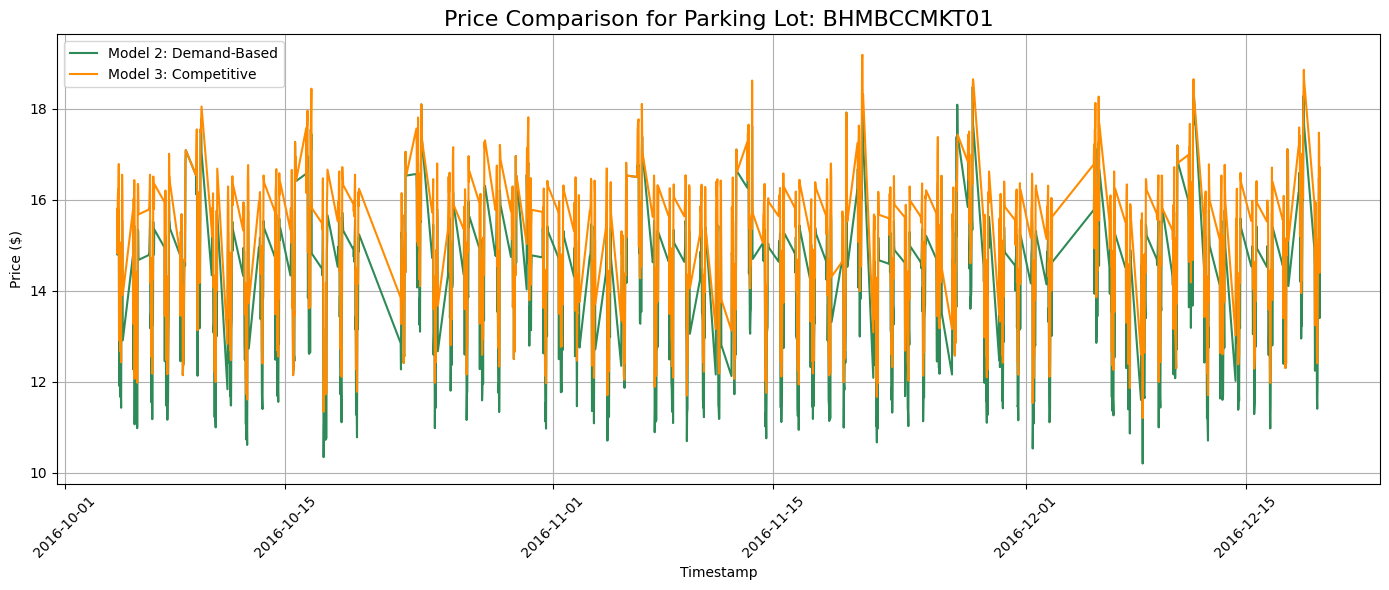

In [56]:
import matplotlib.pyplot as plt

lot_id = 'BHMBCCMKT01'
lot_df = df[df['SystemCodeNumber']==lot_id]

plt.figure(figsize=(14,6))
plt.plot(lot_df['Timestamp'], lot_df['Model2_Price'], label='Model 2: Demand-Based', color='seagreen')
plt.plot(lot_df['Timestamp'], lot_df['Model3_Price'], label='Model 3: Competitive', color='darkorange')

# Beautify it
plt.title(f'Price Comparison for Parking Lot: {lot_id}', fontsize=16)
plt.xlabel('Timestamp')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()